# CREDIT  RISK MODELLING 

# 1. Setting the Background
The most pressing questions for banks are how efficiently can we guage the risk profile of our customers and how can we use this information to decide on the required liquidity while still maintaining our regulatory obligations. 

With the constantly changing customer portfolio and the ever increasing customer base a more robust non-hardcoded approach is neccessary to achieve these antagonistic goals. 

Thus comes the idea of using machine learning to develop a behavioural scorecard to pull data from both internal sources, customer transactions and their demographic data, to predict the probability of default. 

In this notebook we are going to explore the data cleaning and transformation as well as machine learing modelling in predicting probability of default. We can then use these results to develop a credit rating. 

We will eplore the following concepts in the notebook
1. Data cleaning - Struucturing the data for modelling 
2. What to do with missing values 
3. How to deal with class imbalance and the implications. 


# 2. Libraries and Data Import

In [1]:
#pip install -U imbalanced-learn

In [37]:
# Impoting general libraries
import warnings
import itertools
import random

# Data Analysis Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mn

# Data Preparation, Modeling, and Evaluation (SKLearn Modules)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler,RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Class Imbalance
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score,make_scorer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Machine Learning Models 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

# Machine Learning Model Evaluation Methods 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

warnings.filterwarnings(action="ignore")
%matplotlib inline

In [3]:
#Loading data 
Loan = pd.read_csv(r"C:\Users\User\Desktop\Zindua_Class_Data\Machine_Learning_Class1\Week3_CreditRiskClassification_Project\raw-data.csv")
Loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0
2,3,0,0,26.0,0.0,1707.0,38900.0,30.0,1346.0,SC,...,NaN,105000.0,38900.0,34.0,31.0,31,31,16,TIER 1,0
3,4,0,0,24.0,0.0,2128.0,42900.0,24.0,1375.0,SC,...,NaN,NaN,42900.0,NaN,NaN,0,0,0,TIER 1,0
4,5,0,0,27.0,0.0,1824.0,40900.0,30.0,4140.0,MC,...,NaN,NaN,40900.0,NaN,NaN,0,0,0,TIER 1,0


In [4]:
#Renaming columns in the dataset with their correct names
Loan_renamed = Loan.rename(columns={'V1': 'Customer ID',
'V2': 'Customer has bounced in first EMI', 
'V3': 'No of times bounced 12 months',
'V4': 'Maximum MOB',
'V5': 'No of times bounced while repaying the loan',
'V6': 'EMI',
'V7': 'Loan Amount',
'V8': 'Tenure',
'V9': 'Dealer codes from where customer has purchased the Two wheeler',
'V10': 'Product code of Two wheeler', 
'V11': 'No of advance EMI paid',
'V12': 'Rate of interest',
'V13': 'Gender',
'V14': 'Employment type',
'V15': 'Resident type of customer',
'V16': 'Date of birth',
'V17': 'Customer age when loanwas taken',
'V18': 'No of loans',
'V19': 'No of secured loans',
'V20': 'No of unsecured loans',
'V21': 'Max amount sanctioned in the Live loans',
'V22': 'No of new loans in last 3 months',
'V23': 'Total sanctioned amount in the secured Loans which are Live',
'V24': 'Total sanctioned amount in the unsecured Loans which are Live',
'V25': 'Maximum amount sanctioned for any Two wheeler loan',
'V26': 'Time since last Personal loan taken (in months)',
'V27': 'Time since first consumer durables loan taken (in months)',
'V28': 'No of times 30 days past due in last 6 months',
'V29': 'No of times 60 days past due in last 6 months',
'V30': 'No of times 90 days past due in last 3 months',
'V31': 'Tier',
'V32': 'Target variable'})
Loan_renamed.head(2)

,Customer ID,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,Loan Amount,Tenure,Dealer codes from where customer has purchased the Two wheeler,Product code of Two wheeler,...,Total sanctioned amount in the secured Loans which are Live,Total sanctioned amount in the unsecured Loans which are Live,Maximum amount sanctioned for any Two wheeler loan,Time since last Personal loan taken (in months),Time since first consumer durables loan taken (in months),No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Tier,Target variable
0,1,0,0,24.0,0.0,2432.0,46500.0,24.0,1385.0,SC,...,NaN,NaN,46500.0,NaN,NaN,0,0,0,TIER 1,0
1,2,0,1,24.0,1.0,1495.0,28168.0,24.0,2496.0,MO,...,NaN,NaN,28168.0,NaN,NaN,0,0,0,TIER 1,0


# 3. Basic EDA and Data Cleaning

In [5]:
Loan_renamed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119528 entries, 0 to 119527
Data columns (total 32 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Customer ID                                                     119528 non-null  int64  
 1   Customer has bounced in first EMI                               119528 non-null  int64  
 2   No of times bounced 12 months                                   119528 non-null  int64  
 3   Maximum MOB                                                     85048 non-null   float64
 4   No of times bounced while repaying the loan                     85048 non-null   float64
 5   EMI                                                             85048 non-null   float64
 6   Loan Amount                                                     85048 non-null   float64
 7   Tenure                                

As illustrated there are quite a number of features with missing values, we will speak to this in the subsequent sections

## 3.2 Exploring Missingness

<Axes: >

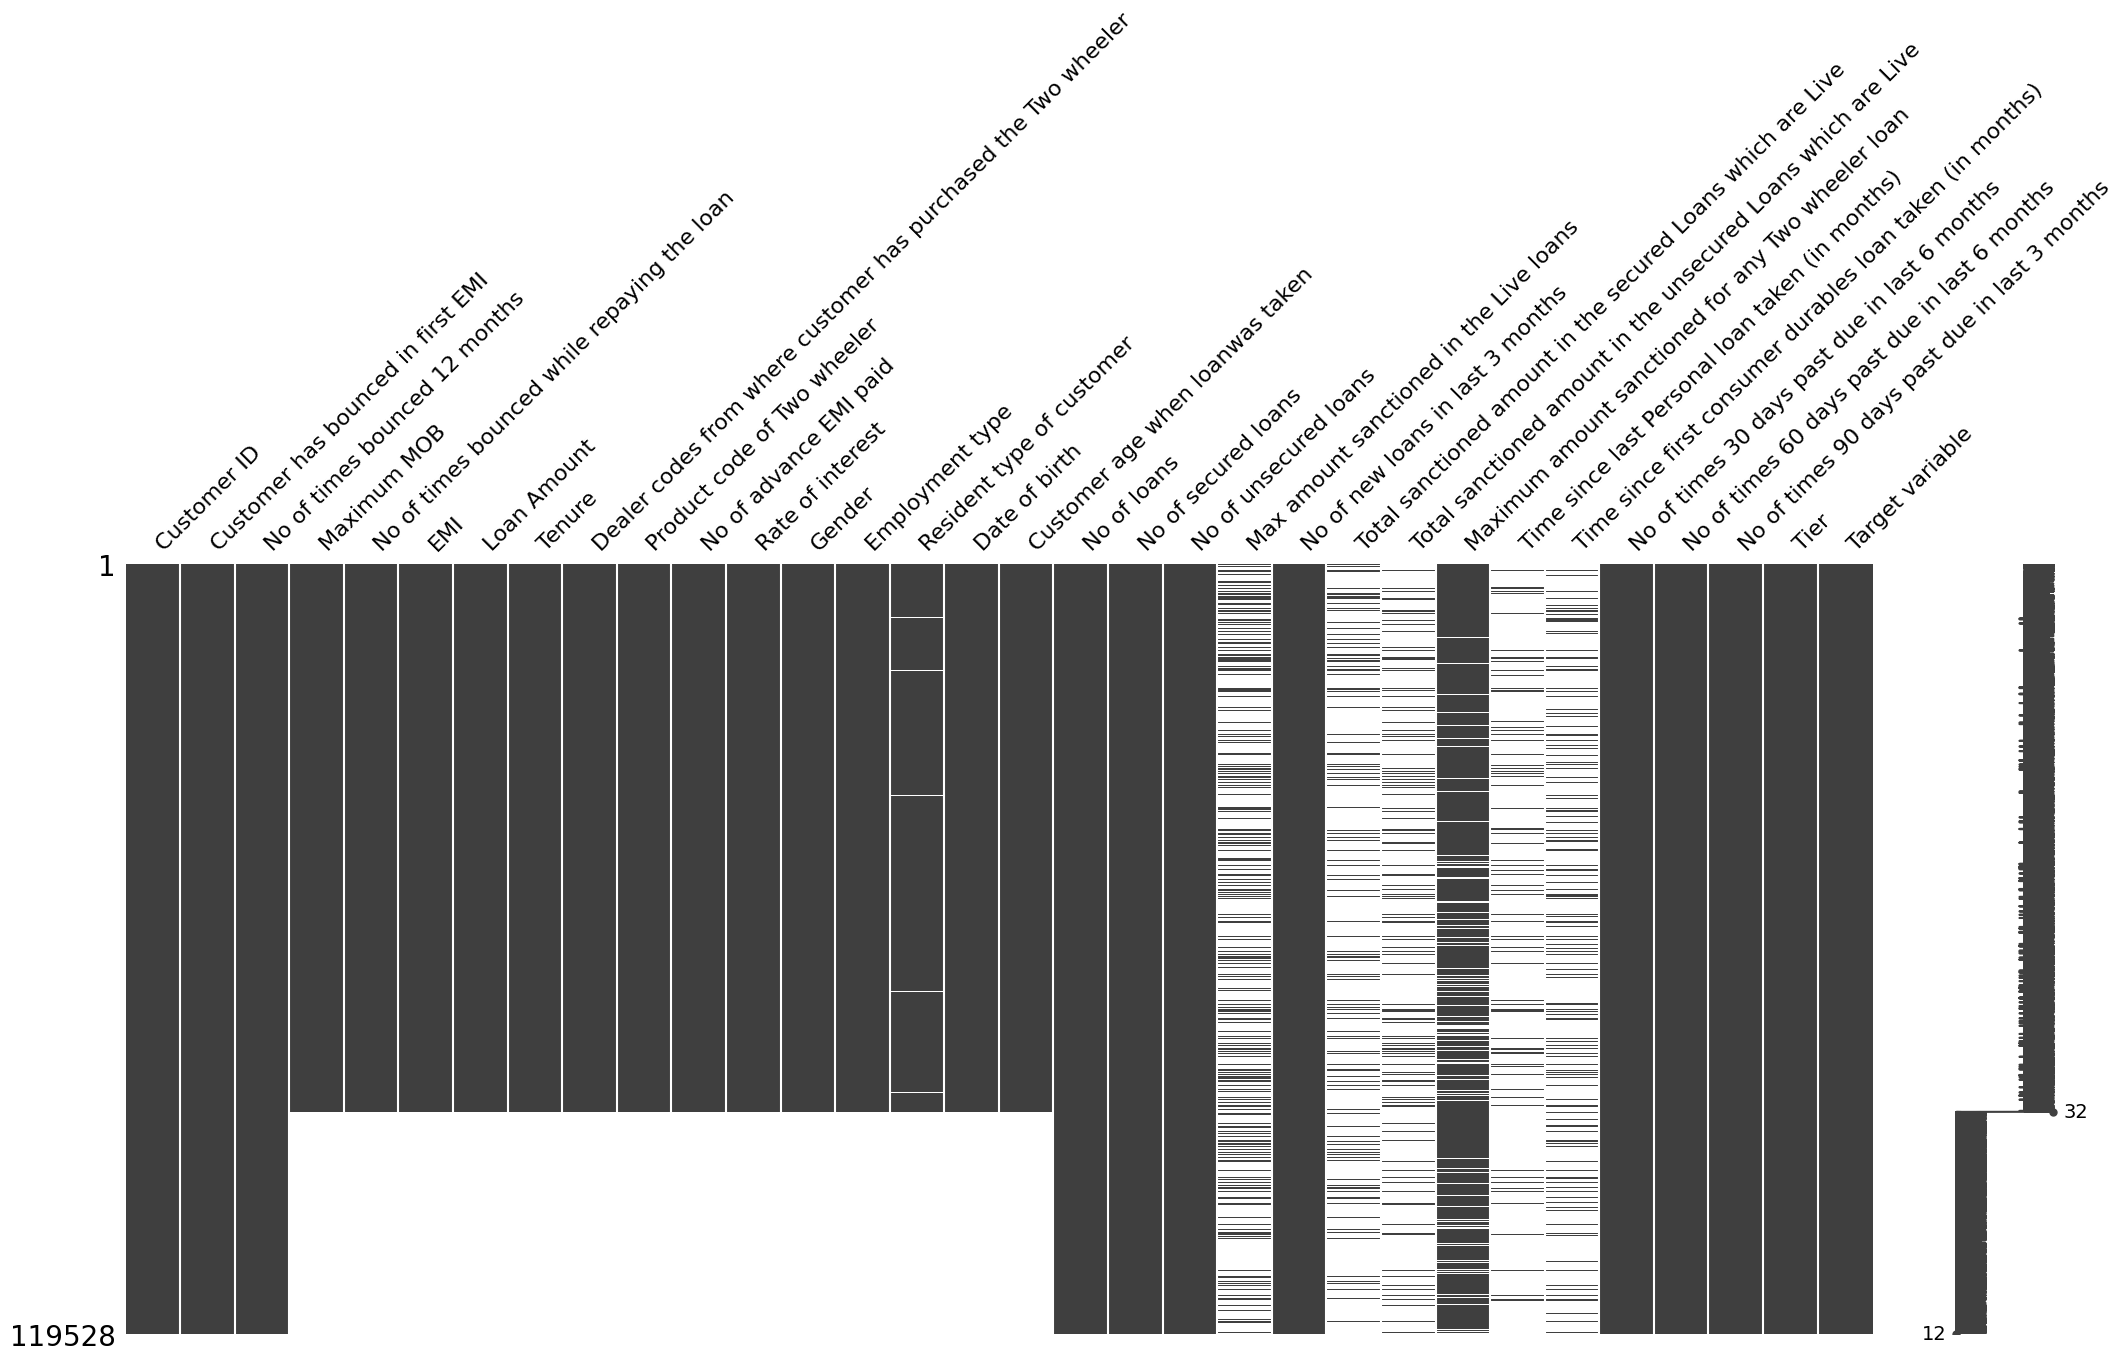

In [6]:
mn.matrix(Loan_renamed)

We are looking to model the probability of loan defaulting, drop all rows with missing loan amount.

In [7]:
# Missing values treatment, drops any row with missing values in the loan and gender column
Loan_renamed.dropna(axis=0,how='any',subset=['Loan Amount','Gender'],inplace=True)

In [8]:
#Removing irrelevant columns
#irrelevant_columns = ['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)','Customer ID']
#I will argue the ID column is also irrelevant
Loan_renamed.drop(['Time since first consumer durables loan taken (in months)','Time since last Personal loan taken (in months)','Customer ID'], axis = 1, inplace = True)
Loan_renamed.shape

(85048, 29)

<Axes: >

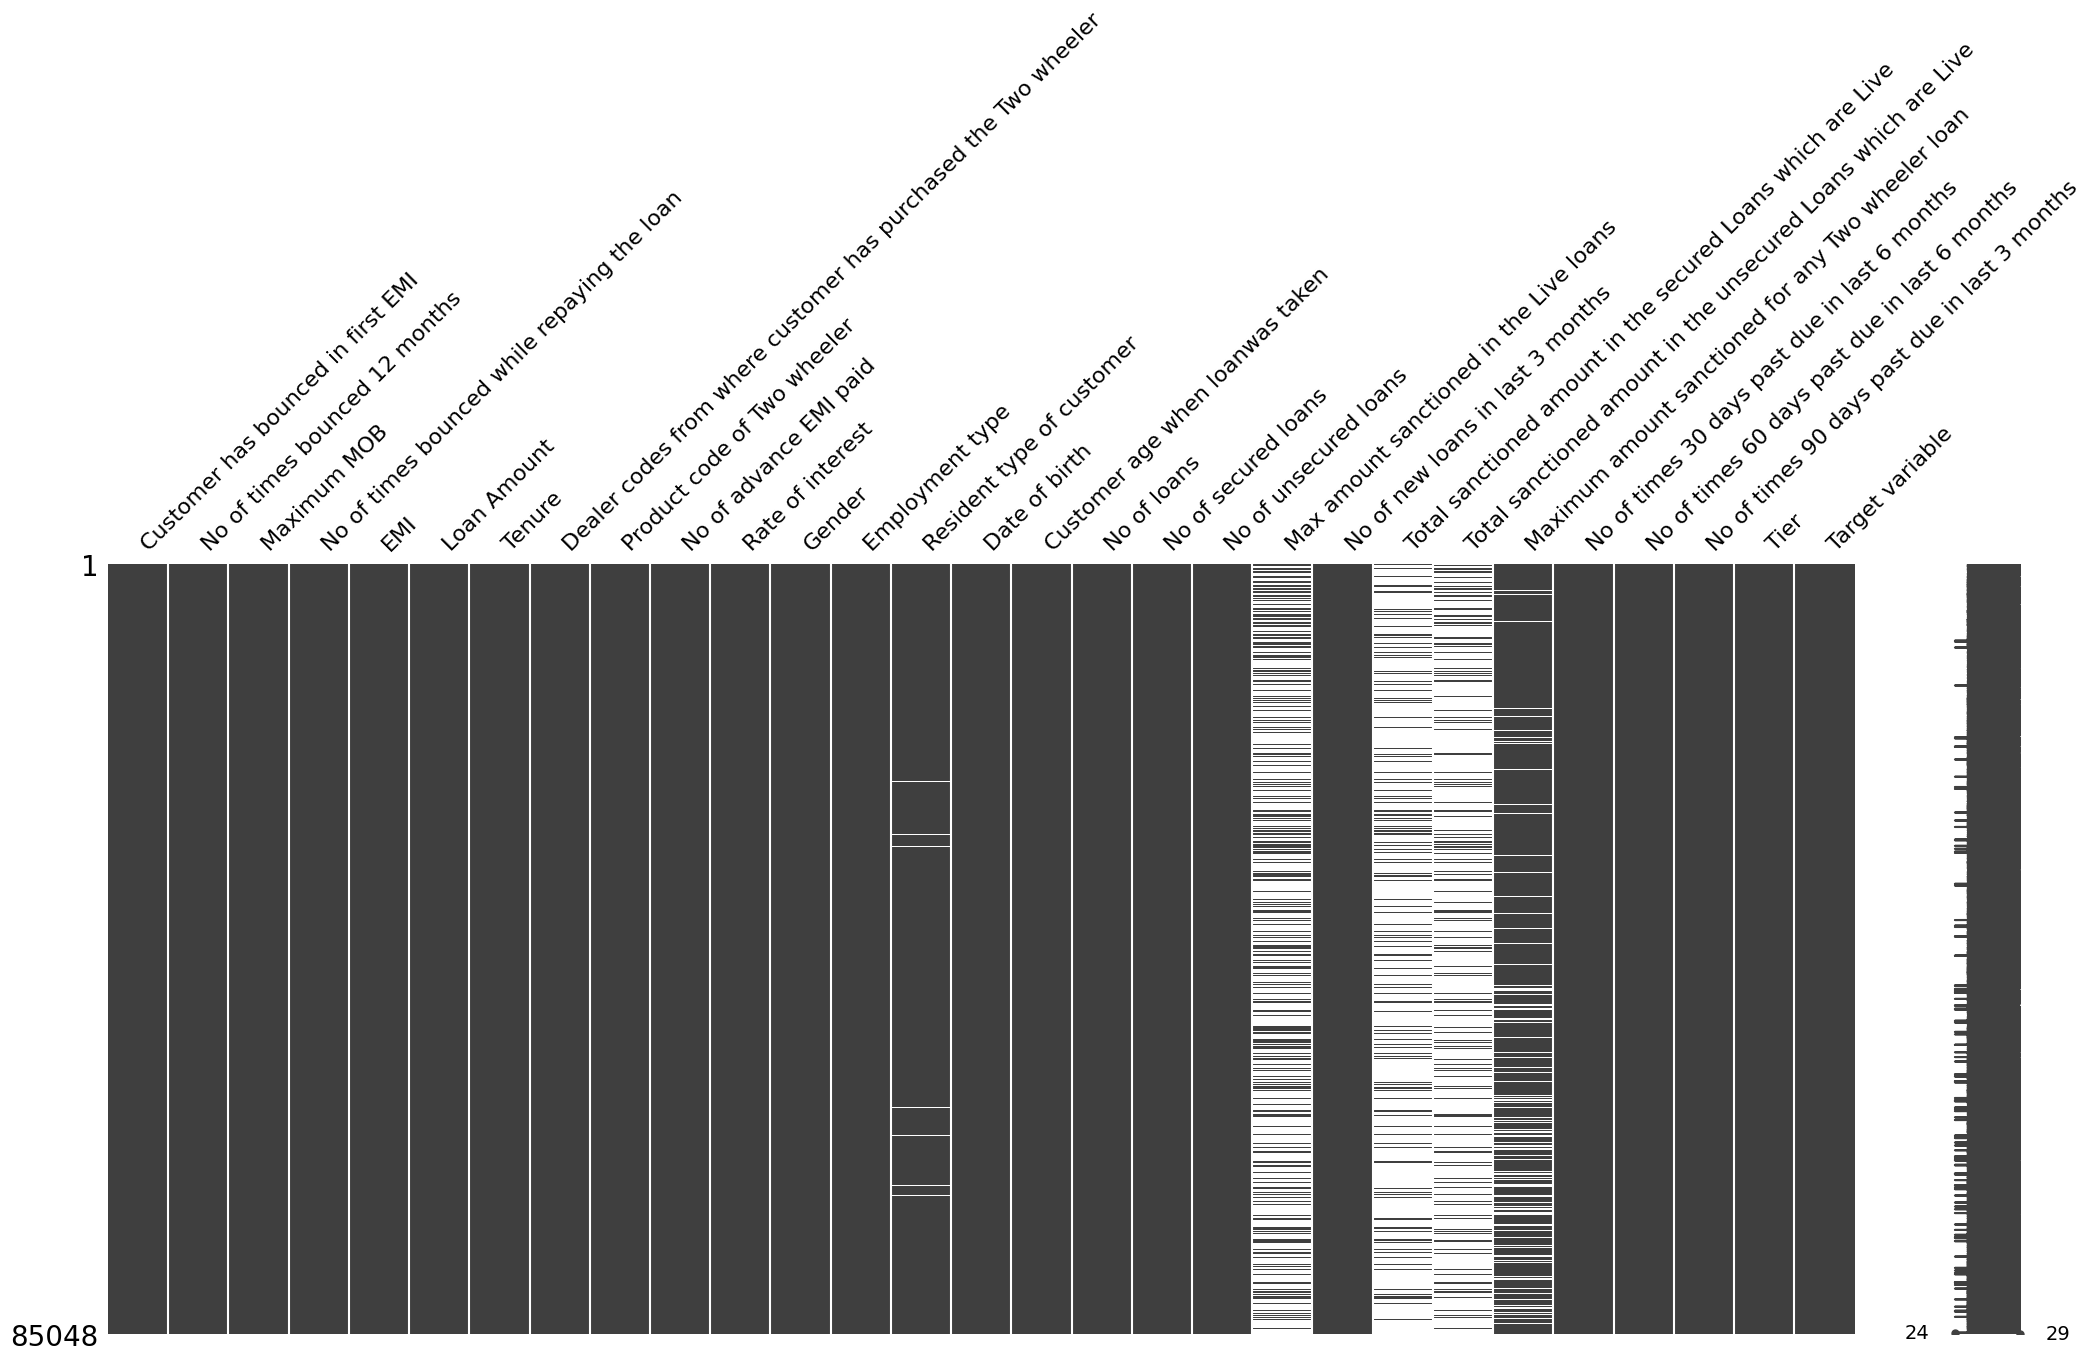

In [9]:
mn.matrix(Loan_renamed)

In [10]:
# rows with missing values after drop
Loan_renamed.columns[Loan_renamed.isnull().sum()>0] # columns with missing value present 

Index(['Resident type of customer', 'Max amount sanctioned in the Live loans',
       'Total sanctioned amount in the secured Loans which are Live',
       'Total sanctioned amount in the unsecured Loans which are Live',
       'Maximum amount sanctioned for any Two wheeler loan'],
      dtype='object')

In [11]:
#determine the percent missingness in each column
total_missing=Loan_renamed.isnull().sum().sort_values(ascending=False)
percent=Loan_renamed.isnull().sum().sort_values(ascending=False)/Loan_renamed.isnull().count().sort_values(ascending=False)
missing_df=pd.concat([total_missing,percent],axis=1,keys=['total_missing','percentage_missing'],sort=False)
missing_df.index.name='variable'# set the index name to variable 
missing_df=missing_df[total_missing>0] # only retain those with missing values 
missing_df['percentage_missing']=missing_df['percentage_missing'].map(lambda x:x*100) # convert to percentage 
missing_df

,total_missing,percentage_missing
variable,,
Total sanctioned amount in the unsecured Loans which are Live,71464,84.027843
Total sanctioned amount in the secured Loans which are Live,71275,83.805616
Max amount sanctioned in the Live loans,58930,69.290283
Maximum amount sanctioned for any Two wheeler loan,10730,12.616405
Resident type of customer,917,1.078215


 Drop all features that have more than 50% missing values as imputing these features will introduce bias to the model.

In [12]:
Loan_renamed.drop(['Total sanctioned amount in the secured Loans which are Live',
                   'Total sanctioned amount in the unsecured Loans which are Live',
                   'Max amount sanctioned in the Live loans'],axis=1,inplace=True)
Loan_renamed.shape

(85048, 26)

### 3.2.1 Ploting distributions to address missingness

In [13]:
#split dataframe into numerical data
num_data=Loan_renamed.select_dtypes(include=[np.number])

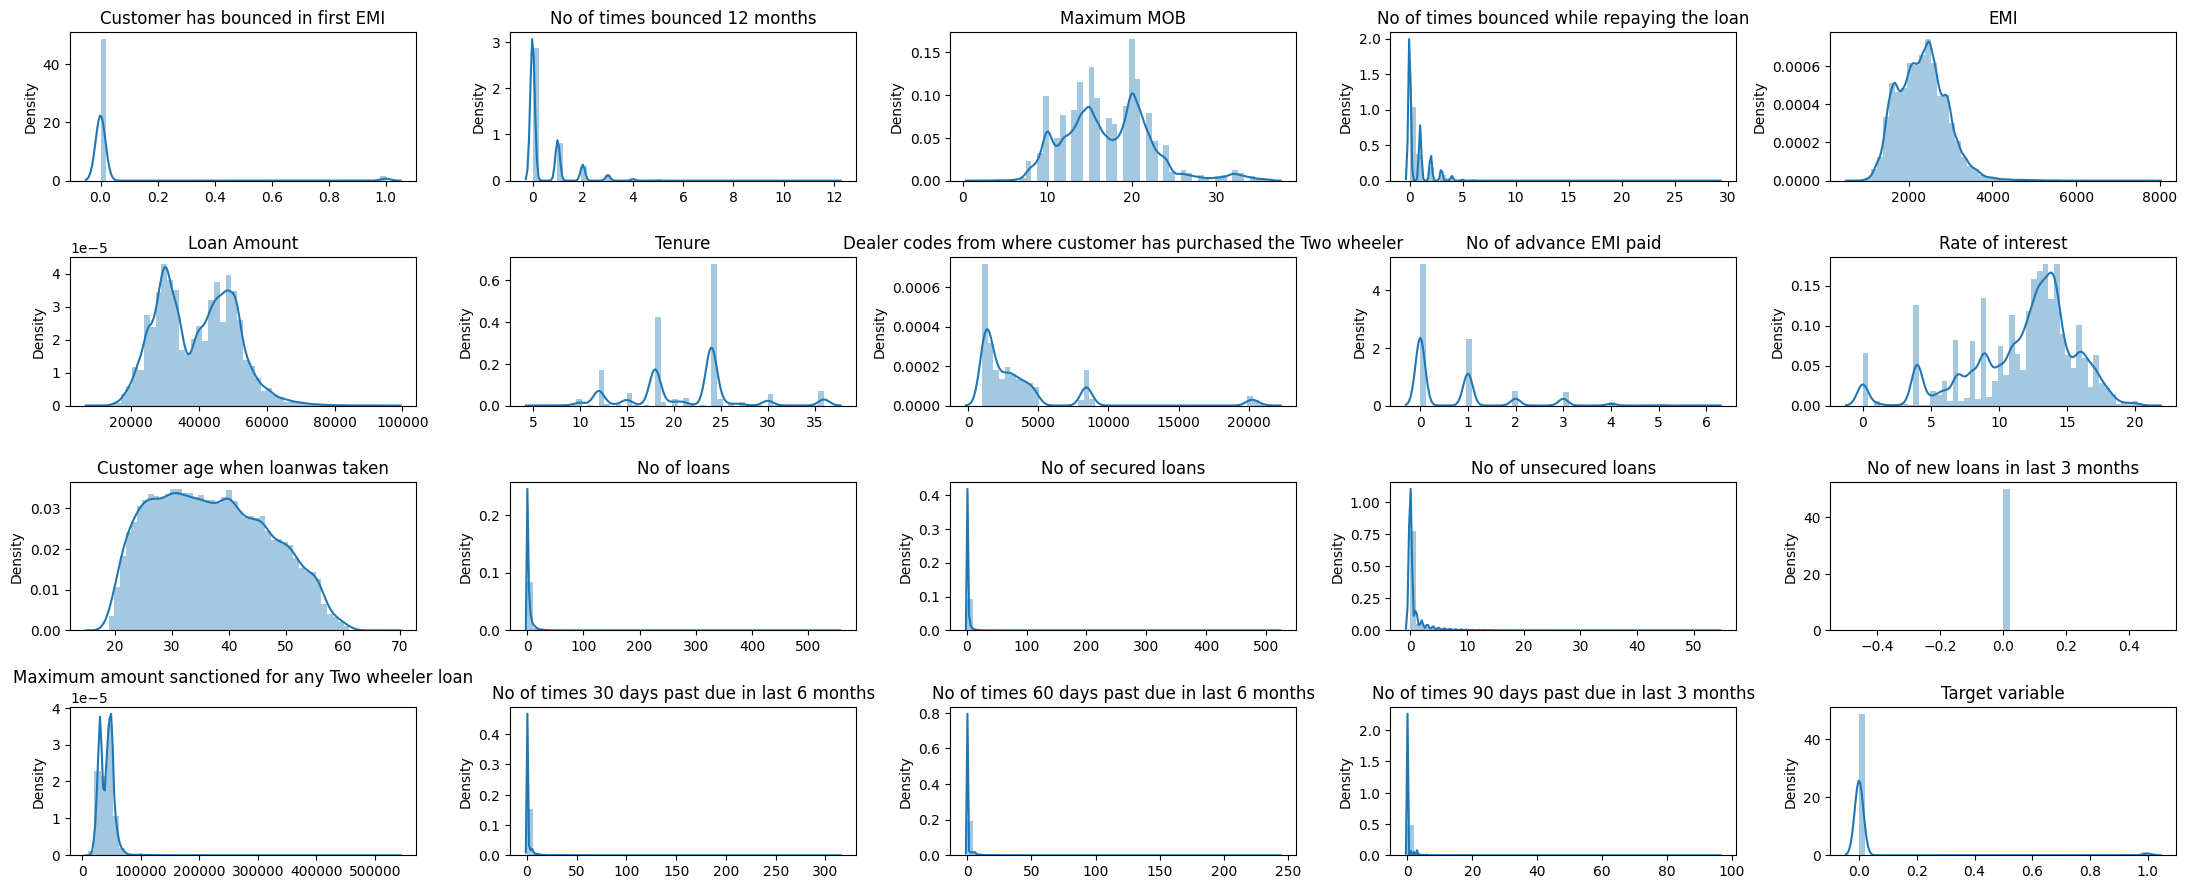

In [14]:
fig = plt.figure(figsize=(22,20))
for i in range(len(num_data.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.distplot(x=num_data.iloc[:, i],ax=ax)
    ax.set_title(num_data.columns[i])
    
plt.tight_layout()
plt.show()

#### Insights from Data Distribution:
Most features in the data set follow a bimodal distribution, which means median imputation is preferred for numerical data.
Now, impute missingness with SimpleImputer.SimpleImputer expects a data frame as input, using a single column as input will not work. 

In [15]:
numerical=Loan_renamed.select_dtypes(include=[np.number])
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer=imputer.fit(numerical)
numerical_imputed=imputer.transform(numerical)
num_df=pd.DataFrame(numerical_imputed,columns=numerical.columns)


In [16]:
#split into numerical and categorial dfs and impute
categorical=Loan_renamed.select_dtypes(include=[object])
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(categorical)
categorical_imputed=imputer.transform(categorical)
cat_df=pd.DataFrame(categorical_imputed, columns=categorical.columns)



In [17]:
#concat the numerical and categorical dfs to one
data=pd.concat([cat_df,num_df], axis=1)
data.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Date of birth,Tier,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,SC,FEMALE,HOUSEWIFE,OWNED,30-05-1974,TIER 1,0.0,0.0,24.0,0.0,...,40.0,1.0,1.0,0.0,0.0,46500.0,0.0,0.0,0.0,0.0
1,MO,MALE,SELF,RENT,01-09-1967,TIER 1,0.0,1.0,24.0,1.0,...,47.0,1.0,1.0,0.0,0.0,28168.0,0.0,0.0,0.0,0.0
2,SC,MALE,SELF,RENT,04-05-1983,TIER 1,0.0,0.0,26.0,0.0,...,31.0,9.0,6.0,3.0,0.0,38900.0,31.0,31.0,16.0,0.0
3,SC,FEMALE,SAL,RENT,10-12-1989,TIER 1,0.0,0.0,24.0,0.0,...,24.0,1.0,1.0,0.0,0.0,42900.0,0.0,0.0,0.0,0.0
4,MC,MALE,SAL,RENT,24-09-1984,TIER 1,0.0,0.0,27.0,0.0,...,30.0,1.0,1.0,0.0,0.0,40900.0,0.0,0.0,0.0,0.0


## 3.3 Outliers

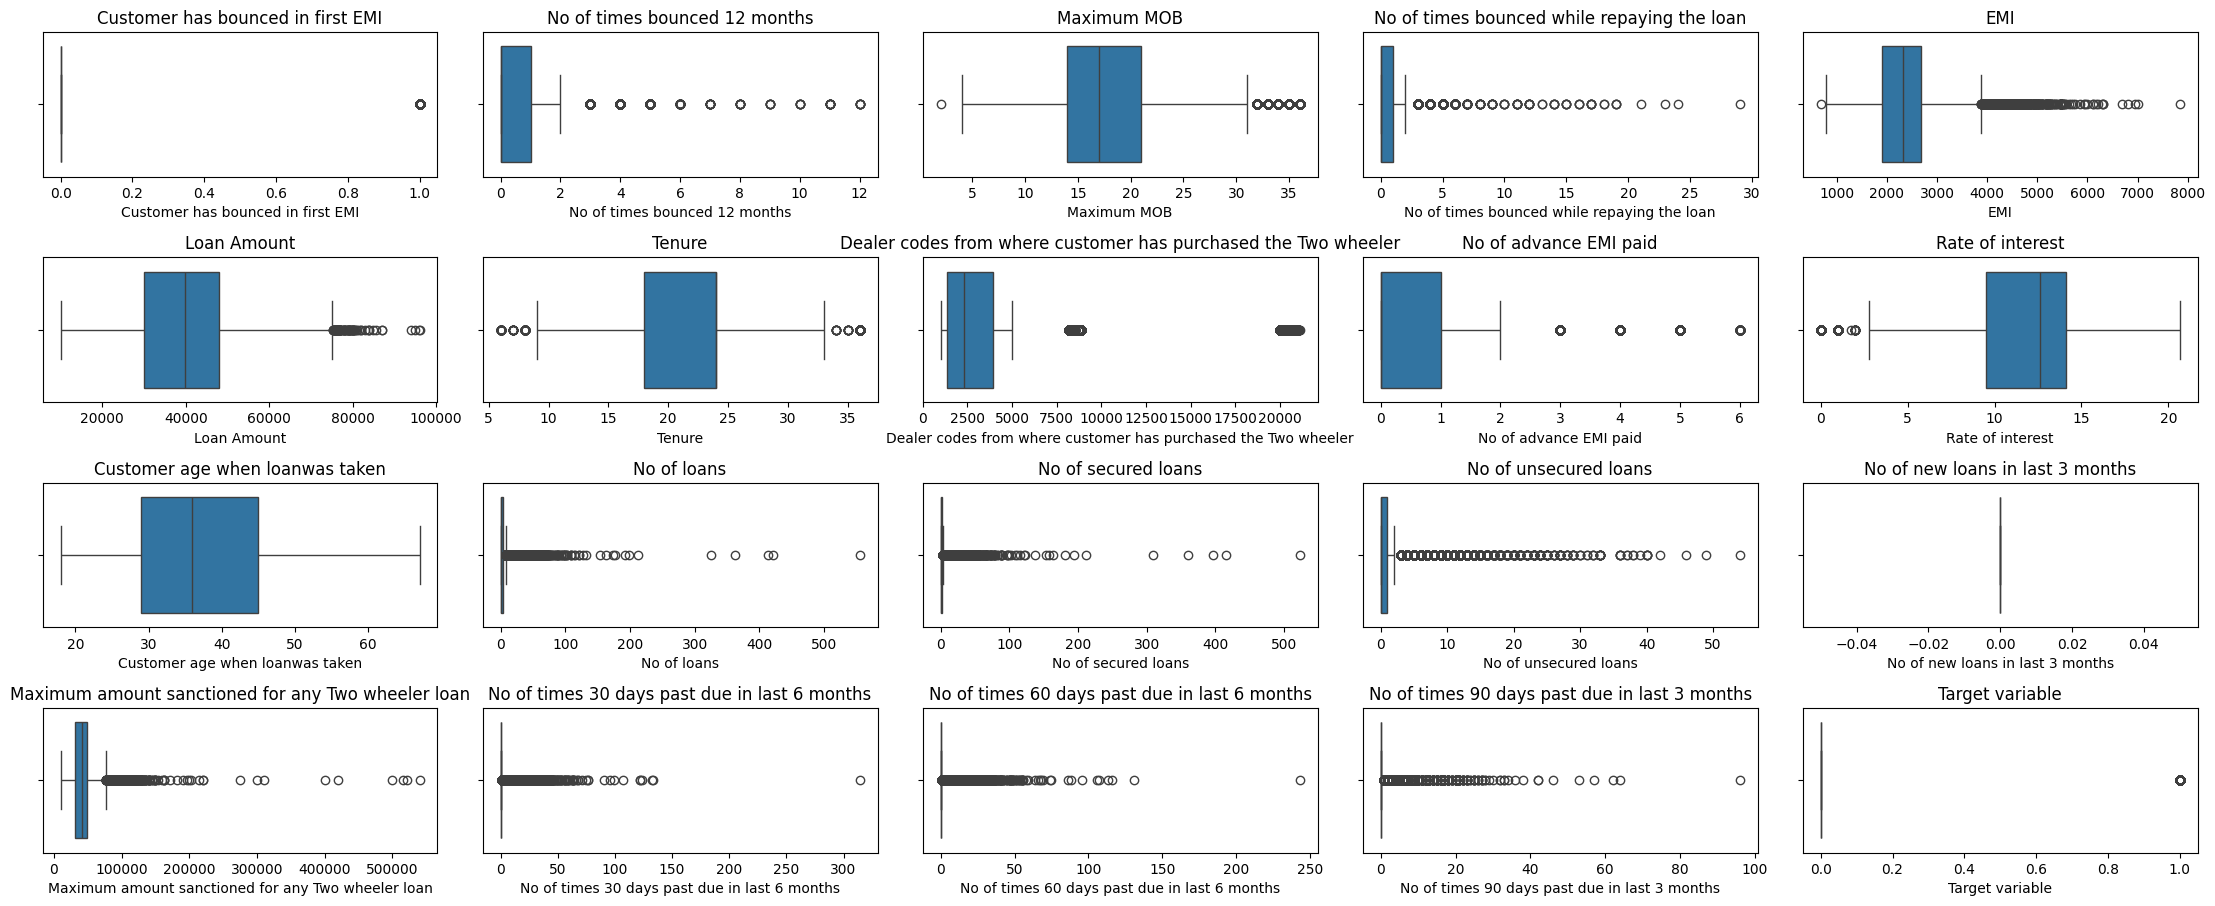

In [18]:
fig = plt.figure(figsize=(22,20))
for i in range(len(num_data.columns)):
    ax=fig.add_subplot(9, 5, i+1)
    sns.boxplot(x=num_data.iloc[:, i],ax=ax)
    ax.set_title(num_data.columns[i])
plt.tight_layout()
plt.show()

Numerous features in the data have outliers- the strategy to handle outliers will be to select models that are less sensitive to outliers such as random forest and/or using a robust scaler.

In [19]:
cat_df.drop('Date of birth',axis=1,inplace=True)

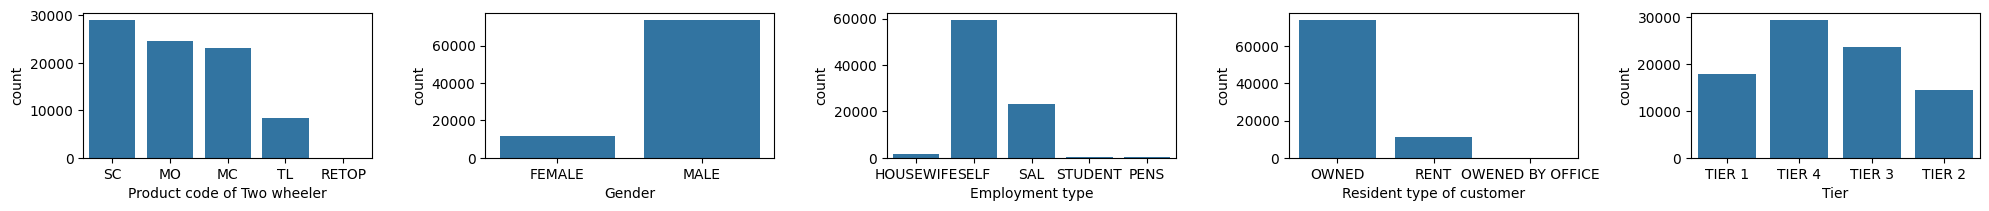

In [20]:
fig = plt.figure(figsize=(20,18))
for i in range(len(cat_df.columns)):
    fig.add_subplot(9, 5, i+1)
    sns.countplot(x=cat_df.iloc[:, i])
plt.tight_layout()
plt.show()

## 3.4 Corelations

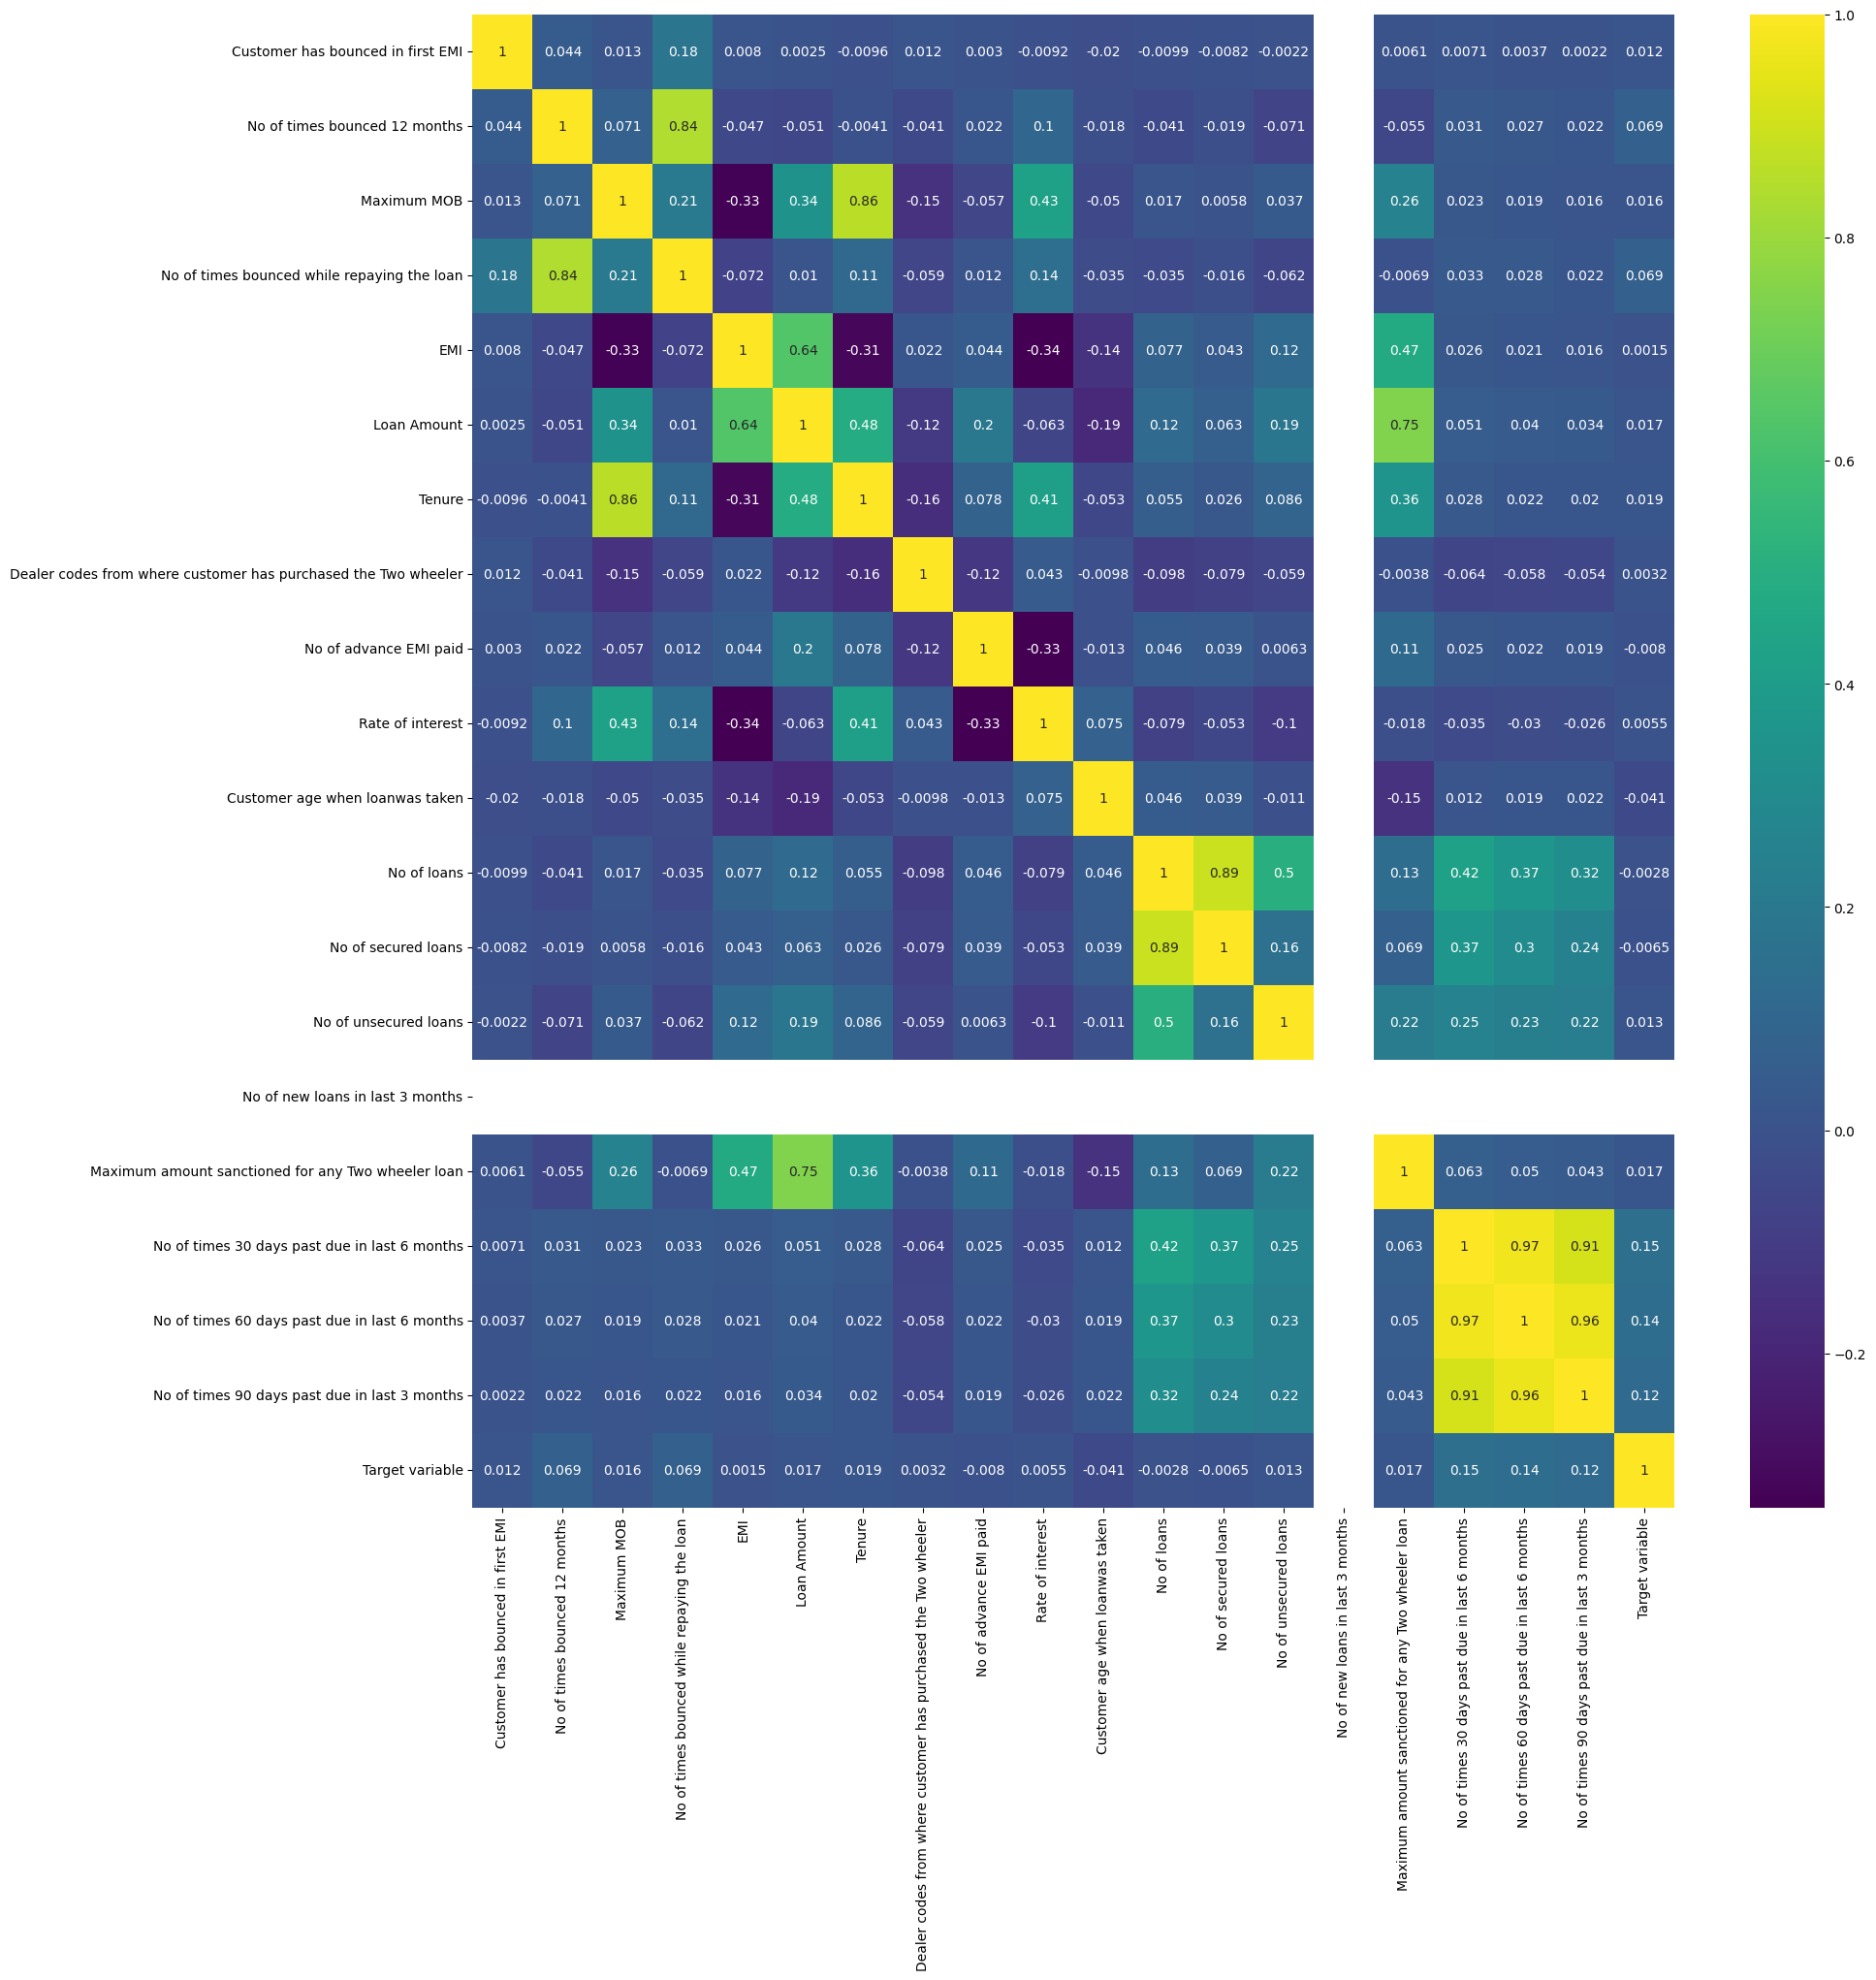

In [21]:
#correlation matrix
corrmat = num_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(num_df[top_corr_features].corr(),annot=True,cmap="viridis")

Investigate why the No of new loans in the last 3 months variable is blank in the matrix- This is because all values are zeros.

In [22]:
data['No of new loans in last 3 months']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
85043    0.0
85044    0.0
85045    0.0
85046    0.0
85047    0.0
Name: No of new loans in last 3 months, Length: 85048, dtype: float64

For the three plots about LOAN AMOUNT, you could indicate why each is significant and what insights it gives that are different from the other or maybe what it adds on.

<Axes: title={'center': 'Loan Amount (Box Plot)'}, xlabel='Employment type', ylabel='Loan Amount'>

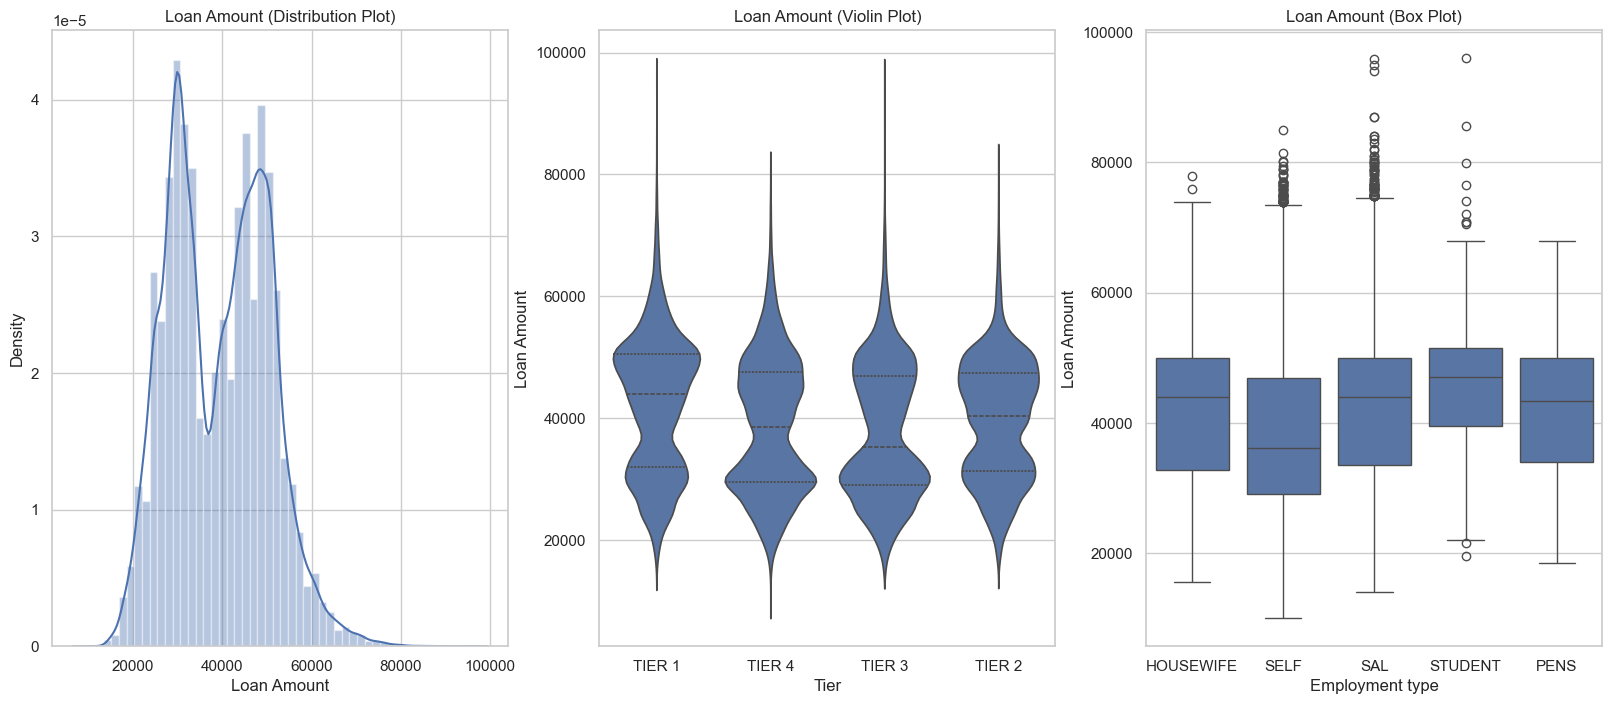

In [23]:
sns.set(style="whitegrid")

fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
ax[0].set_title("Loan Amount (Distribution Plot)")
sns.distplot(data['Loan Amount'],ax=ax[0])
ax[1].set_title("Loan Amount (Violin Plot)")
sns.violinplot(data =data, x='Tier',y='Loan Amount',ax=ax[1], inner="quartile")
ax[2].set_title("Loan Amount (Box Plot)")
sns.boxplot(data =data, x='Employment type',y='Loan Amount',ax=ax[2],orient='v')

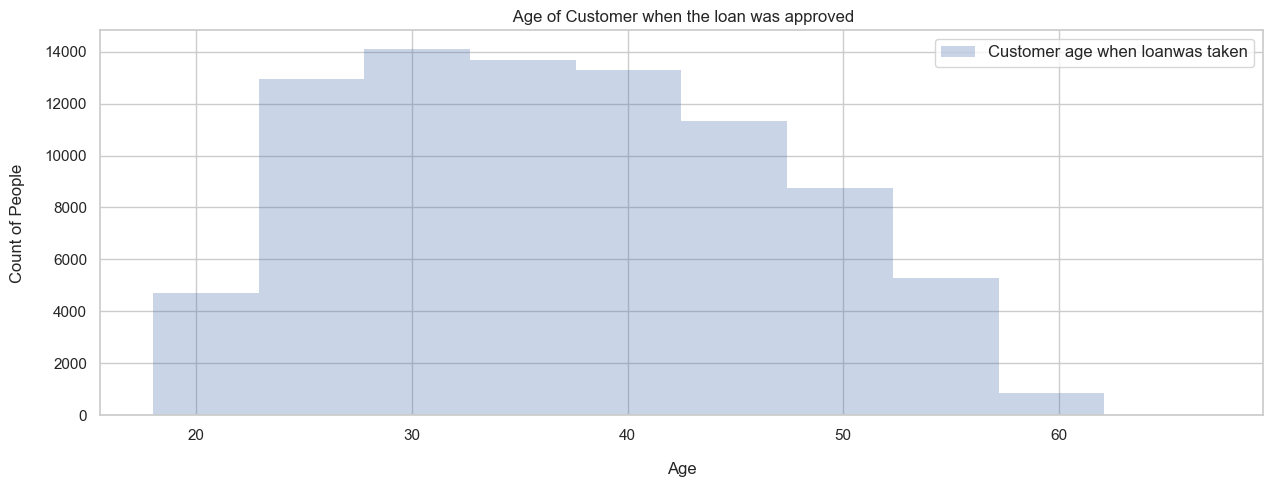

In [24]:
##Age- age at which the client took the loan
plt.figure(figsize=(15,5))

#bar plot
Loan_renamed['Customer age when loanwas taken'].plot(kind='hist',color='b',alpha=0.3, edgecolor='none')
plt.xlabel("Age", labelpad=14)
plt.ylabel("Count of People", labelpad=14)
plt.title(" Age of Customer when the loan was approved")
plt.legend(loc="best",prop={"size":12})

# 4. Data Preprocessing

### 4.1 Encoding

1. Label encoding
We can use LabelEncoder to encode our variable to numbers. What a label encoder essentially does is that it sees the first value in the column and converts it to 0, next value to 1 and so on.The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship. This approach works reasonably well with tree models

2. One hot encoding
For categorical variables where no such ordinal relationship exists, the integer/label encoding does not suffice. In fact, using this encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the integer representation. This is where the integer encoded variable is removed and a new binary variable is added for each unique integer value.

So if we have n levels in a category, we will get n-1 features.

In [25]:
# Dealing with categorical columns
# Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in cat_df:
    data[feature] = le.fit_transform(data[feature].astype(str))

In [26]:
data.drop('Date of birth',axis=1,inplace=True)
data.head()

,Product code of Two wheeler,Gender,Employment type,Resident type of customer,Tier,Customer has bounced in first EMI,No of times bounced 12 months,Maximum MOB,No of times bounced while repaying the loan,EMI,...,Customer age when loanwas taken,No of loans,No of secured loans,No of unsecured loans,No of new loans in last 3 months,Maximum amount sanctioned for any Two wheeler loan,No of times 30 days past due in last 6 months,No of times 60 days past due in last 6 months,No of times 90 days past due in last 3 months,Target variable
0,3,0,0,1,0,0.0,0.0,24.0,0.0,2432.0,...,40.0,1.0,1.0,0.0,0.0,46500.0,0.0,0.0,0.0,0.0
1,1,1,3,2,0,0.0,1.0,24.0,1.0,1495.0,...,47.0,1.0,1.0,0.0,0.0,28168.0,0.0,0.0,0.0,0.0
2,3,1,3,2,0,0.0,0.0,26.0,0.0,1707.0,...,31.0,9.0,6.0,3.0,0.0,38900.0,31.0,31.0,16.0,0.0
3,3,0,2,2,0,0.0,0.0,24.0,0.0,2128.0,...,24.0,1.0,1.0,0.0,0.0,42900.0,0.0,0.0,0.0,0.0
4,0,1,2,2,0,0.0,0.0,27.0,0.0,1824.0,...,30.0,1.0,1.0,0.0,0.0,40900.0,0.0,0.0,0.0,0.0


### 4.2 Treating Class Imbalance

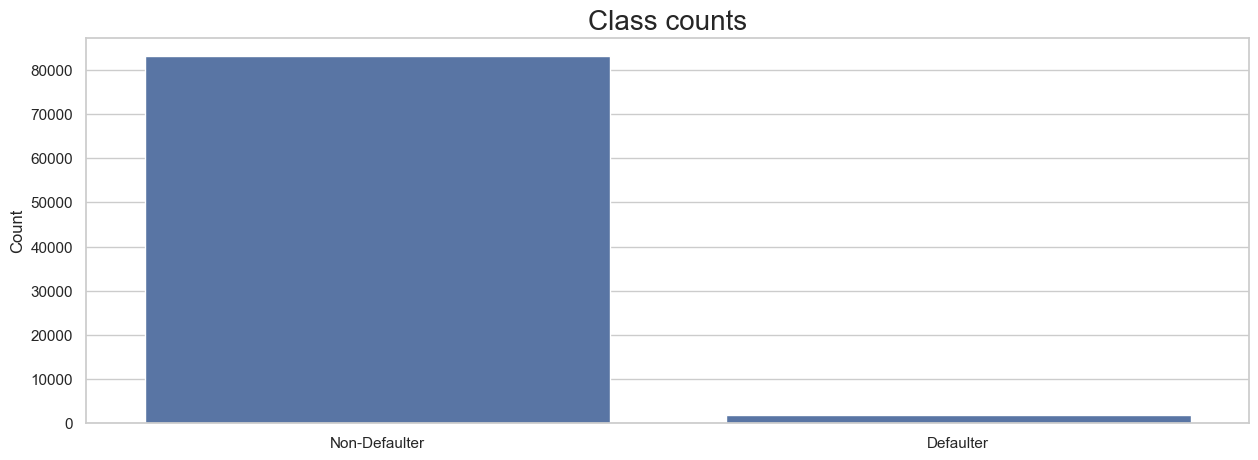

In [27]:
fig=plt.figure(figsize=(15,5))
sns.countplot(x='Target variable',data=data)
plt.xticks((0, 1), ["Non-Defaulter", "Defaulter"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts",fontdict={"fontsize": 20})

plt.show()

In [28]:
print(data['Target variable'].value_counts())

Target variable
0.0    83194
1.0     1854
Name: count, dtype: int64


The data set is pretty imbalanced as expected where positive examples defualters are significanltly less than 25%. We'll explain in the next section how to handle all of them after giving an overview of ensemble methods


In [29]:
X=data.drop('Target variable',axis=1)
y=data[['Target variable']]

### SMOTE
S𝒚𝒏𝒕𝒉𝒆𝒕𝒊𝒄 𝒎𝒊𝒏𝒐𝒓𝒊𝒕𝒚 𝒐𝒗𝒆𝒓𝒔𝒂𝒎𝒑𝒍𝒊𝒏𝒈 𝒕𝒆𝒄𝒉𝒏𝒊𝒒𝒖𝒆- creates examples of the minority class by looking at the distribution of the minority class and "guesses" what the other cases would have been

pick two points that are relatively closer to each other distance wise
draw a line
generate a new point along that line
It doesn't always work but a lot of time it works and it is a good technique to look at when there is no way of generating more data and the aforementioned techniques are not applicable per se It is better for increasing precision(𝙥𝙤𝙨𝙞𝙩𝙞𝙫𝙚 𝙞𝙙𝙚𝙣𝙩𝙞𝙛𝙞𝙚𝙙 𝙖𝙨 𝒕𝒉𝒂𝒕 𝒂𝒓𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆 ) but this comes at the cost of recall (𝒐𝒖𝒕 𝒐𝒇 𝒂𝒍𝒍 𝒕𝒉𝒆 𝒑𝒐𝒔𝒊𝒕𝒊𝒗𝒆𝒔 𝒘𝒉𝒊𝒄𝒉 𝒐𝒏𝒆𝒔 𝒉𝒂𝒗𝒆 𝒃𝒆𝒆𝒏 𝒄𝒐𝒓𝒓𝒆𝒄𝒕𝒍𝒚 𝒊𝒅𝒆𝒏𝒕𝒊𝒇𝒊𝒆𝒅)

array([[<Axes: title={'center': 'Target variable'}>]], dtype=object)

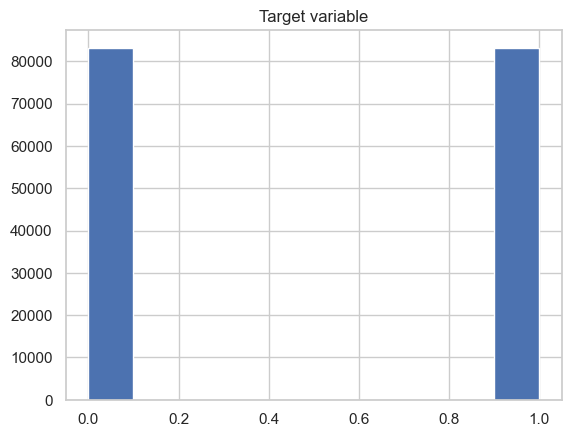

In [30]:
smote_sample=SMOTE(random_state=124,sampling_strategy='auto')
# the sampling strategy can be one of float, str, dict or callable `float``,
#it corresponds to the desired ratio of the number of samples in the minority class over the number of samples in the majority class after resampling ie {1:500}
# ``'minority'``: resample only  minority class; 'not minority'``:all but the minority class; ``'not majority'``: all but the majority, ``'all'`` ,``'auto'``:
x_res, y_res=smote_sample.fit_resample(X,y)


# now plot the classes
y_res.hist()

### 4.3 Model Selection-Exploring Linear Separability

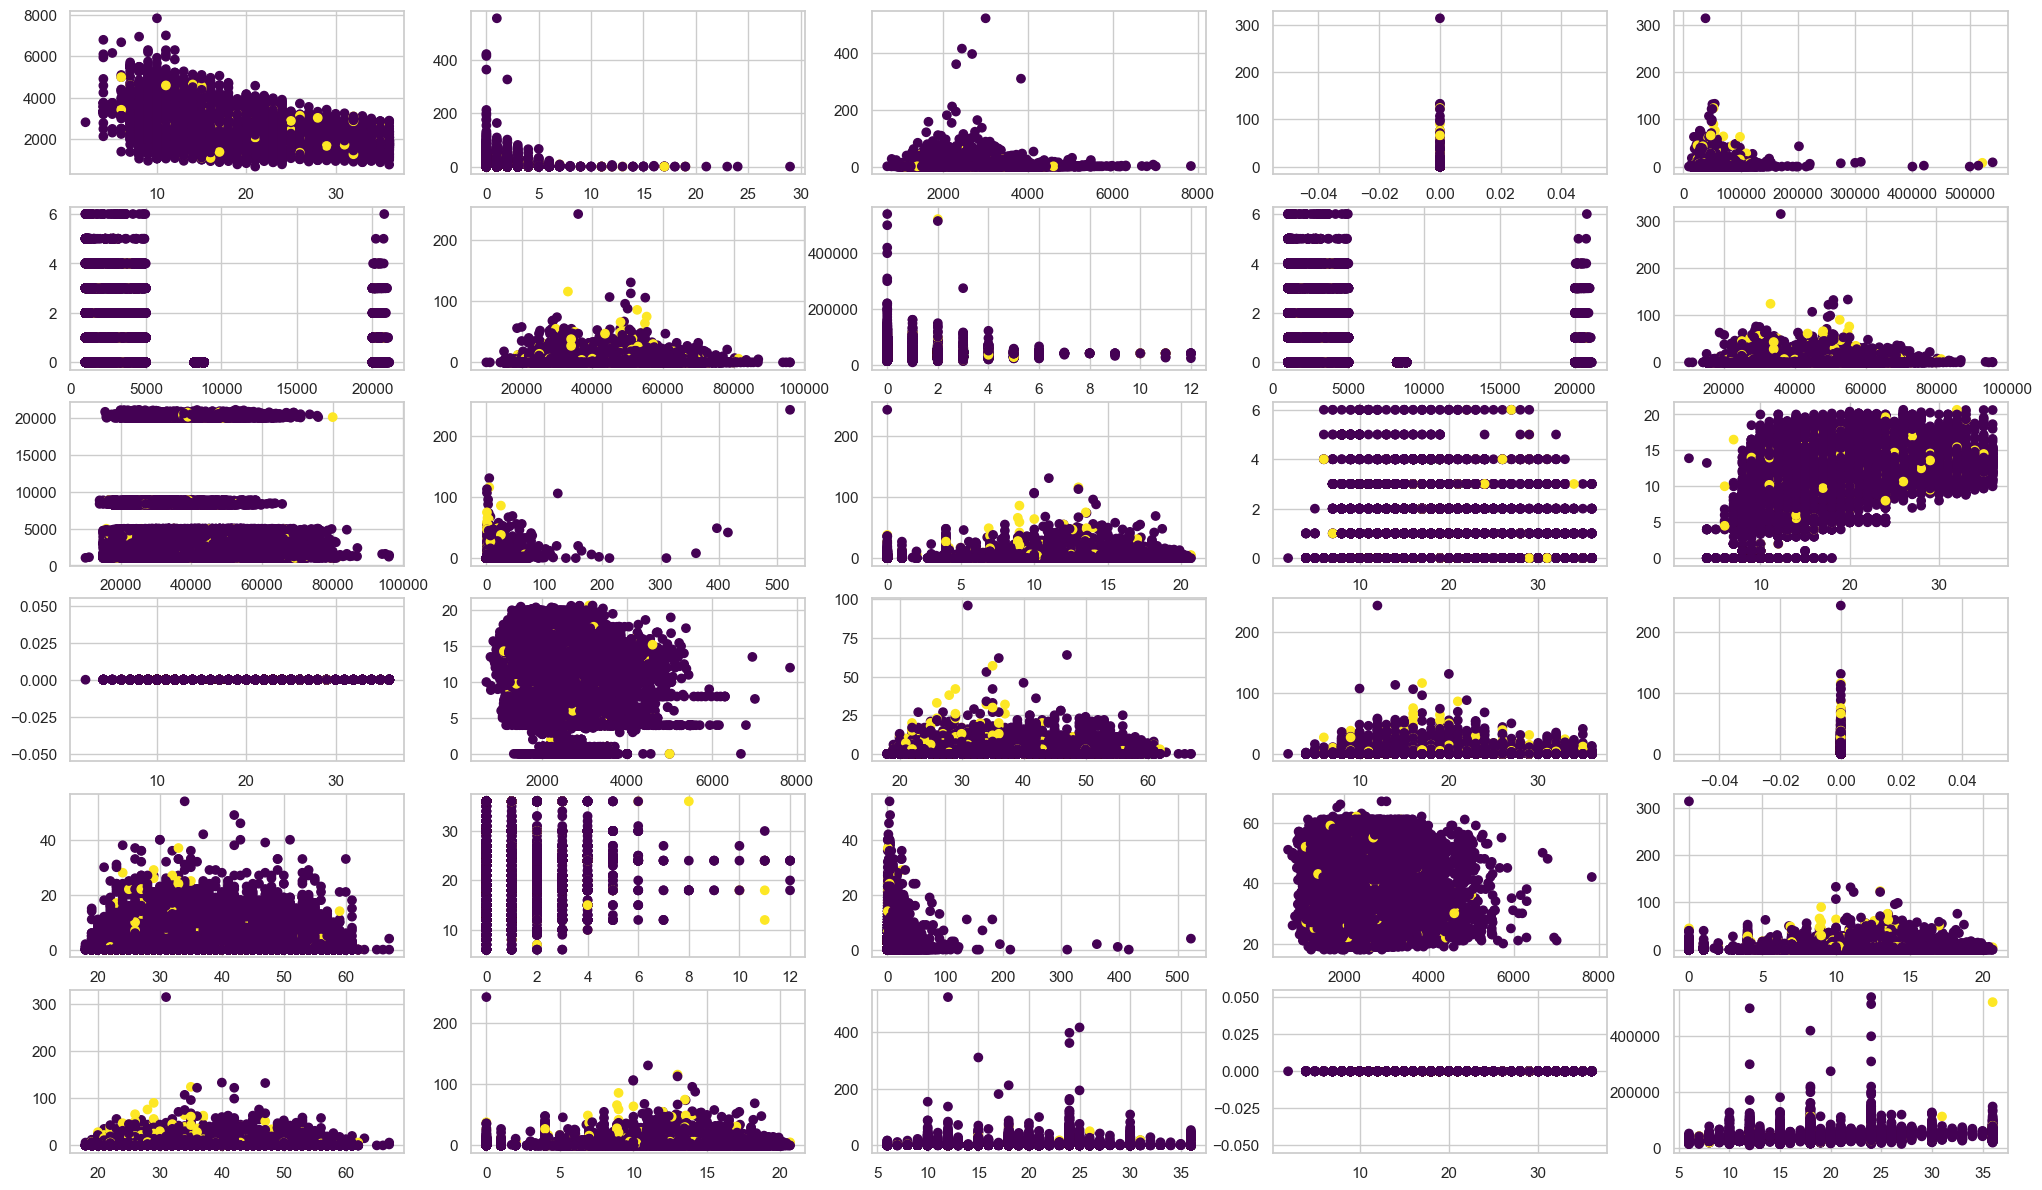

In [31]:
#Check for linear separavility- Bivariate analysis using scatter plots
import random
comb = list(itertools.combinations([a for a in range(1, len(num_df.columns))], 2)) #Create combinations of all features, in twos (bivariate)
rand = random.choices(comb, k=30) #Randomly choose 30 bivariate relationships to visualise. Total bivariate relationships (4060 = 30C3) is too much

fig = plt.figure(figsize=(25,25))
for i in range(len(rand)):
    ax = fig.add_subplot(10,5, i+1)
    plt.scatter(num_df[num_df.columns[rand[i][0]]],num_df[num_df.columns[rand[i][1]]],c=num_df['Target variable'],cmap='viridis')

### Insights from linear separabillity
From the scatter plot, we can conclude that our data is not 
linearly separable. Therefore the best models to perform classification are non-linear classifiers such as SVM with kernels, decision trees, and random forests.

# 5. Modelling with the balanced data


In [32]:
#Train Test Split: Reserve 30% of data for final model testing
X_train, X_test, y_train, y_test = train_test_split (x_res, y_res, test_size=0.20, random_state=20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(133110, 24) (33278, 24) (133110, 1) (33278, 1)


In [38]:
recall = make_scorer(recall_score, average='binary')

In [39]:
#classification with Random forest
rfc=RandomForestClassifier(n_estimators=50)
scores = cross_val_score(rfc, X_train, y_train, cv=5,scoring=recall)
print(scores,scores.mean())

[0.98197522 0.98430342 0.98024784 0.9794217  0.98152598] 0.9814948325049375


In [ ]:
#classification with SVM non-linear kernels


## Challenge: 
- Explore the linear separabillity of the two classes and document your intuition of the best model type to give you the best results. 
- Document the effect of multicolleaniarity in model performance. 
- Try different classification models and optimize your output for the best result
- Tune your model after learning these in Week 4 - The submission can be done without this step : It is worth noting that feature engineering is of much importance than hyperparametere tuning as the perfomance  improvement with the latter is always only marginal
- Generate Credit Scores based on the probability score from the model (Optional)
- Identify which customers fall into what category, based on the below ranking methodologies 
> #### The following forms our basis for rank ordering 
> - 0 - 200 Bad Customer ,
> - 201-350 2nd Worst, 
> - 351 - 500 Not So bad,
> - 501 - 700 Ideal guys, 
> - 700> Big loans 

